In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.makedirs('/content/drive/MyDrive/sentiment_project', exist_ok=True)


Mounted at /content/drive


In [3]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

In [4]:
# Load the dataset
def load_json_lines_to_df(filepath: str, max_lines=None):
    data = []
    with open(filepath, 'r') as file:
        for i, line in enumerate(file):
            if max_lines is not None and i >= max_lines:
                break
            try:
                data.append(json.loads(line.strip()))
            except json.JSONDecodeError as e:
                print(f"Error decoding line {i}: {e}")
    return pd.DataFrame(data)

In [5]:
# Get the sentiment from the rating ( rating-based sentiment analysis)
def get_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

In [6]:
# Clean : lower case only, no punctuation, no numbers, no multiple space
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [8]:
df=load_json_lines_to_df("/content/sample_data/Software.jsonl")

Error decoding line 99170: Unterminated string starting at: line 1 column 225 (char 224)


In [9]:
df.info()
df.describe()
df.shape
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99170 entries, 0 to 99169
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             99170 non-null  float64
 1   title              99170 non-null  object 
 2   text               99170 non-null  object 
 3   images             99170 non-null  object 
 4   asin               99170 non-null  object 
 5   parent_asin        99170 non-null  object 
 6   user_id            99170 non-null  object 
 7   timestamp          99170 non-null  int64  
 8   helpful_vote       99170 non-null  int64  
 9   verified_purchase  99170 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 6.9+ MB


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,1.0,malware,mcaffee IS malware,[],B07BFS3G7P,B0BQSK9QCF,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,1562182632076,0,False
1,5.0,Lots of Fun,I love playing tapped out because it is fun to...,[],B00CTQ6SIG,B00CTQ6SIG,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,1424120336000,0,True
2,5.0,Light Up The Dark,I love this flashlight app! It really illumin...,[],B0066WJLU6,B0066WJLU6,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,1362399267000,0,True
3,4.0,Fun game,One of my favorite games,[],B00KCYMAWK,B00KCYMAWK,AH6CATODIVPVUOJEWHRSRCSKAOHA,1561061428662,0,True
4,4.0,I am not that good at it but my kids are,Cute game. I am not that good at it but my kid...,[],B00P1RK566,B00P1RK566,AEINY4XOINMMJCK5GZ3M6MMHBN6A,1418257196000,0,True


In [10]:
df.isna().sum()

,0
rating,0
title,0
text,0
images,0
asin,0
parent_asin,0
user_id,0
timestamp,0
helpful_vote,0
verified_purchase,0


In [11]:
df.dtypes

,0
rating,float64
title,object
text,object
images,object
asin,object
parent_asin,object
user_id,object
timestamp,int64
helpful_vote,int64
verified_purchase,bool


In [12]:
df.describe()

,rating,timestamp,helpful_vote
count,99170.000000,9.917000e+04,99170.000000
mean,3.819835,1.487829e+12,3.706625
std,1.491606,9.149208e+10,19.759577
min,1.000000,9.517750e+11,0.000000
25%,3.000000,1.423708e+12,0.000000
50%,5.000000,1.483117e+12,0.000000
75%,5.000000,1.560770e+12,2.000000
max,5.000000,1.679170e+12,2091.000000


<Axes: title={'center': 'Rating Distribution'}, xlabel='rating'>

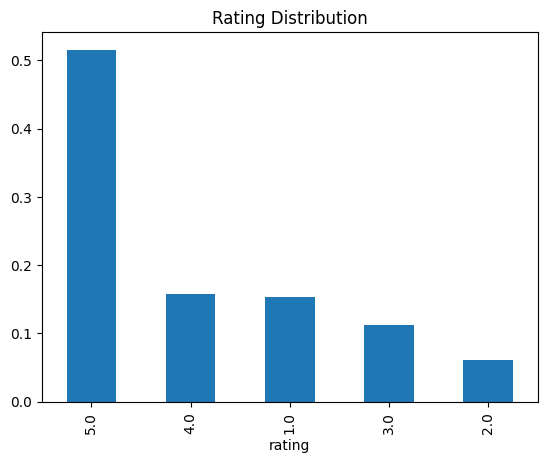

In [13]:
df['rating'].value_counts(normalize=True).plot(kind='bar', title='Rating Distribution')

In [14]:
df_orig=df.copy()

In [15]:
df['sentiment'] = df['rating'].apply(get_sentiment)

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

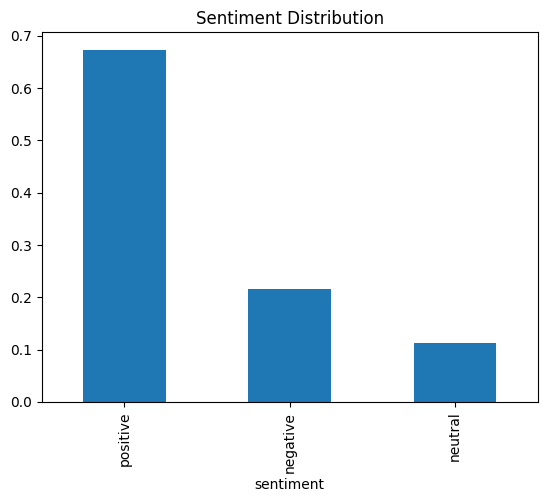

In [16]:
df['sentiment'].value_counts(normalize=True).plot(kind='bar', title='Sentiment Distribution')

In [17]:
df['text'].apply(lambda x: len(x)).describe()
df['text'].apply(lambda x: len(x.split())).describe()

,text
count,99170.000000
mean,31.191005
std,65.083865
min,0.000000
25%,4.000000
50%,14.000000
75%,32.000000
max,2882.000000


In [18]:
df['title'].apply(lambda x: len(x)).describe()
df['title'].apply(lambda x: len(x.split())).describe()

,title
count,99170.000000
mean,3.565242
std,3.045733
min,1.000000
25%,2.000000
50%,2.000000
75%,4.000000
max,37.000000


In [19]:
df['verified_purchase'] = df['verified_purchase'].astype(int)

In [20]:
df['full_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')

In [22]:
df['label'] = df['rating'].apply(get_sentiment)

In [23]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,sentiment,full_text,label
0,1.0,malware,mcaffee IS malware,[],B07BFS3G7P,B0BQSK9QCF,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,1562182632076,0,0,negative,malware mcaffee IS malware,negative
1,5.0,Lots of Fun,I love playing tapped out because it is fun to...,[],B00CTQ6SIG,B00CTQ6SIG,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,1424120336000,0,1,positive,Lots of Fun I love playing tapped out because ...,positive
2,5.0,Light Up The Dark,I love this flashlight app! It really illumin...,[],B0066WJLU6,B0066WJLU6,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,1362399267000,0,1,positive,Light Up The Dark I love this flashlight app! ...,positive
3,4.0,Fun game,One of my favorite games,[],B00KCYMAWK,B00KCYMAWK,AH6CATODIVPVUOJEWHRSRCSKAOHA,1561061428662,0,1,positive,Fun game One of my favorite games,positive
4,4.0,I am not that good at it but my kids are,Cute game. I am not that good at it but my kid...,[],B00P1RK566,B00P1RK566,AEINY4XOINMMJCK5GZ3M6MMHBN6A,1418257196000,0,1,positive,I am not that good at it but my kids are Cute ...,positive


In [27]:
data=df.copy()

In [28]:
data = data.drop(columns=['asin', 'parent_asin', 'user_id', 'images'])

In [29]:
data['verified_purchase'] = data['verified_purchase'].astype(int)

In [30]:
data.head()

,rating,title,text,timestamp,helpful_vote,verified_purchase,sentiment,full_text,label
0,1.0,malware,mcaffee IS malware,1562182632076,0,0,negative,malware mcaffee IS malware,negative
1,5.0,Lots of Fun,I love playing tapped out because it is fun to...,1424120336000,0,1,positive,Lots of Fun I love playing tapped out because ...,positive
2,5.0,Light Up The Dark,I love this flashlight app! It really illumin...,1362399267000,0,1,positive,Light Up The Dark I love this flashlight app! ...,positive
3,4.0,Fun game,One of my favorite games,1561061428662,0,1,positive,Fun game One of my favorite games,positive
4,4.0,I am not that good at it but my kids are,Cute game. I am not that good at it but my kid...,1418257196000,0,1,positive,I am not that good at it but my kids are Cute ...,positive


In [31]:
X_text = data['full_text']
X_extra = data[['verified_purchase', 'helpful_vote']]  # optional
y = data['label']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(data['full_text'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(data['label'])  # 'positive', 'neutral', 'negative' → 0, 1, 2

In [ ]:
y_encoded

array([0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2,
       0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2,
       2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 0, 1,
       2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2,

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=300)  # keep top 300 features
X_chi2 = selector.fit_transform(X_tfidf, y_encoded)

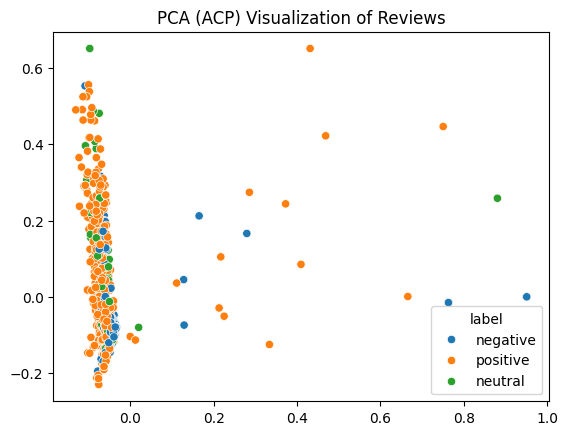

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_chi2.toarray())

# Visualize
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['label'])
plt.title("PCA (ACP) Visualization of Reviews")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_chi2, y_encoded, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

SVM Accuracy: 0.685
              precision    recall  f1-score   support

    negative       0.68      0.50      0.57        54
     neutral       1.00      0.06      0.11        35
    positive       0.68      0.97      0.80       111

    accuracy                           0.69       200
   macro avg       0.79      0.51      0.50       200
weighted avg       0.74      0.69      0.62       200



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


Random Forest Accuracy: 0.67
              precision    recall  f1-score   support

    negative       0.57      0.56      0.56        54
     neutral       0.75      0.09      0.15        35
    positive       0.71      0.91      0.80       111

    accuracy                           0.67       200
   macro avg       0.67      0.52      0.50       200
weighted avg       0.68      0.67      0.62       200



In [ ]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.7 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 kB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 2.2 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 236.9 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def lemmatize_text(text):
    # Lowercase and remove punctuation
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    words = nltk.word_tokenize(text)

    # Lemmatize and remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalpha()]

    return ' '.join(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
X_text = df['full_text']
X_extra = df[['verified_purchase', 'helpful_vote']]  # optional
y = df['label']
df['verified_purchase'] = df['verified_purchase'].astype(int)
df = df.drop(columns=['asin', 'parent_asin', 'user_id', 'images'])
df['full_text'] = df['full_text'].apply(clean_text)
df['full_text_lemma'] = df['full_text'].apply(lemmatize_text)

KeyError: "['asin', 'parent_asin', 'user_id', 'images'] not found in axis"

In [ ]:
import nltk
nltk.download('punkt')
df['full_text'] = df['full_text'].apply(clean_text)
df['full_text_lemma'] = df['full_text'].apply(lemmatize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/local/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


### 2 millions observation

In [ ]:
def load_json_lines_to_df3(filepath: str, max_lines=20000):
    data = []
    with open(filepath, 'r') as file:
        for i, line in enumerate(file):
            if i >= max_lines:
                break
            try:
                data.append(json.loads(line.strip()))
            except json.JSONDecodeError as e:
                print(f"Error decoding line {i}: {e}")
    return pd.DataFrame(data)

In [ ]:
df2=load_json_lines_to_df3("../data/raw/Software.jsonl")

In [ ]:
df2['verified_purchase'] = df2['verified_purchase'].astype(int)
df2['label'] = df2['rating'].apply(get_sentiment)
df2 = df2.drop(columns=['asin', 'parent_asin', 'user_id', 'images'])

In [ ]:
df2['full_text'] = df2['title'].fillna('') + ' ' + df2['text'].fillna('')
df2['full_text'] = df2['full_text'].apply(clean_text)

In [ ]:
with_no_change=df2.copy()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(df2['full_text'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(df2['label'])  # 'positive', 'neutral', 'negative' → 0, 1, 2

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k='all')  # keep top 300 features
X_chi2 = selector.fit_transform(X_tfidf, y_encoded)

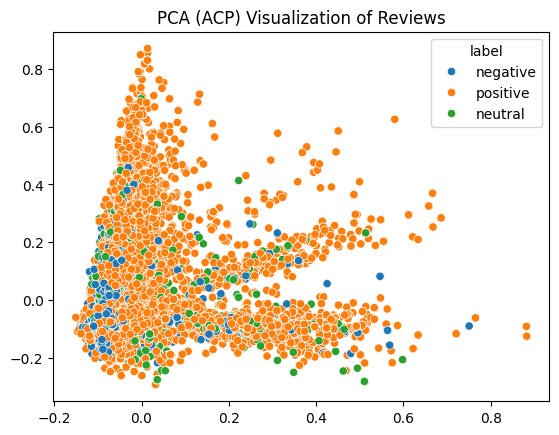

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_chi2.toarray())

# Visualize
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df2['label'])
plt.title("PCA (ACP) Visualization of Reviews")
plt.show()


In [ ]:
df.head()

,rating,title,text,timestamp,helpful_vote,verified_purchase,label,full_text
0,1.0,malware,mcaffee IS malware,1562182632076,0,0,negative,malware mcaffee is malware
1,5.0,Lots of Fun,I love playing tapped out because it is fun to...,1424120336000,0,1,positive,lots of fun i love playing tapped out because ...
2,5.0,Light Up The Dark,I love this flashlight app! It really illumin...,1362399267000,0,1,positive,light up the dark i love this flashlight app i...
3,4.0,Fun game,One of my favorite games,1561061428662,0,1,positive,fun game one of my favorite games
4,4.0,I am not that good at it but my kids are,Cute game. I am not that good at it but my kid...,1418257196000,0,1,positive,i am not that good at it but my kids are cute ...


In [ ]:
df =load_json_lines_to_df3("../data/raw/Software.jsonl")

In [ ]:
df.shape

(20000, 10)

In [ ]:
df =load_json_lines_to_df3("../data/raw/Software.jsonl")
df['verified_purchase'] = df['verified_purchase'].astype(int)
df['label'] = df['rating'].apply(get_sentiment)
df = df.drop(columns=['asin', 'parent_asin', 'user_id', 'images'])

In [ ]:
df['full_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
df['full_text'] = df['full_text'].apply(clean_text)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(df['label'])

In [ ]:
y_encoded

array([0, 2, 2, ..., 2, 2, 2], shape=(10000,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df2['full_text']
y_encoded = df2['label']

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"Training Data Shape: {X_train_tfidf.shape}")
print(f"Test Data Shape: {X_test_tfidf.shape}")

Training Data Shape: (16000, 5000)
Test Data Shape: (4000, 5000)


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply chi-square test for feature selection
chi2_selector = SelectKBest(chi2, k=2000)  # Select top 2000 features
X_train_chi2 = chi2_selector.fit_transform(X_train_tfidf, y_train)
X_test_chi2 = chi2_selector.transform(X_test_tfidf)

print(f"Training Data Shape After Chi-Square: {X_train_chi2.shape}")
print(f"Test Data Shape After Chi-Square: {X_test_chi2.shape}")

Training Data Shape After Chi-Square: (16000, 2000)
Test Data Shape After Chi-Square: (4000, 2000)


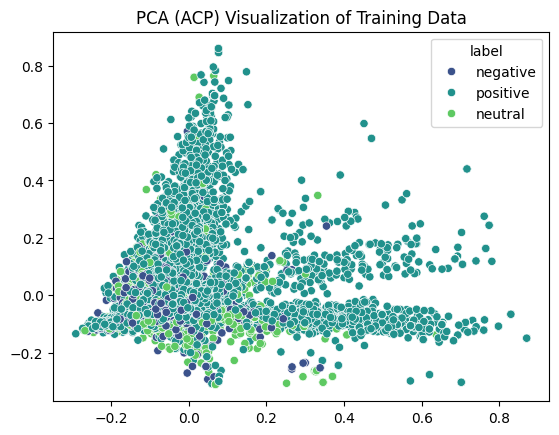

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_chi2.toarray())
X_test_pca = pca.transform(X_test_chi2.toarray())

# Visualize the PCA results
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="viridis")
plt.title("PCA (ACP) Visualization of Training Data")
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train SVM model
svm_model = SVC(kernel='linear')  # You can change the kernel type if needed
svm_model.fit(X_train_chi2, y_train)

# Predictions on the test set
y_pred_svm = svm_model.predict(X_test_chi2)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.83175
              precision    recall  f1-score   support

    negative       0.75      0.74      0.74       813
     neutral       0.64      0.26      0.37       461
    positive       0.86      0.96      0.91      2726

    accuracy                           0.83      4000
   macro avg       0.75      0.65      0.67      4000
weighted avg       0.82      0.83      0.81      4000



In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svm_model, X_train_chi2, y_train, cv=5)
print(f"Cross-validation Scores: {cv_scores}")

Cross-validation Scores: [0.8346875 0.8284375 0.826875  0.8334375 0.8428125]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid you want to search over
param_grid = {
    'C': [0.1, 1, 10, 100],               # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf'],  # Types of kernels
    'gamma': ['scale', 'auto']            # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Initialize the SVM model
svm_model = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train_chi2, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print(f"Best Parameters from GridSearchCV: {best_params}")


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fbf2c559f90>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 

KeyboardInterrupt



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_chi2, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test_chi2)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8235
              precision    recall  f1-score   support

    negative       0.79      0.67      0.73       813
     neutral       0.79      0.20      0.32       461
    positive       0.83      0.97      0.90      2726

    accuracy                           0.82      4000
   macro avg       0.80      0.62      0.65      4000
weighted avg       0.82      0.82      0.80      4000



In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search_rf.fit(X_train_chi2, y_train)
print(grid_search_rf.best_params_)

{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with the best hyperparameters from GridSearchCV
rf_model = RandomForestClassifier(
    max_depth=30,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Apply K-Fold cross-validation
cv_scores = cross_val_score(rf_model, X_train_chi2, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.7725    0.7759375 0.7765625 0.784375  0.7790625]
Mean cross-validation score: 0.7776875000000001


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_chi2, y_train)
y_pred_lr = lr_model.predict(X_test_chi2)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8325
              precision    recall  f1-score   support

    negative       0.77      0.73      0.75       813
     neutral       0.61      0.27      0.38       461
    positive       0.86      0.96      0.91      2726

    accuracy                           0.83      4000
   macro avg       0.75      0.65      0.68      4000
weighted avg       0.82      0.83      0.81      4000



In [ ]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 MB 419.9 kB/s eta 0:00:0000:0100:02

[notice] A new release of pip is available: 23.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train_chi2, y_train)
y_pred_xgb = xgb_model.predict(X_test_chi2)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['negative' 'neutral' 'positive']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_chi2, y_train)
y_pred_knn = knn_model.predict(X_test_chi2)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

### Testing

In [ ]:
df =load_json_lines_to_df3("../data/raw/Software.jsonl")
df['verified_purchase'] = df['verified_purchase'].astype(int)
df['label'] = df['rating'].apply(get_sentiment)
df = df.drop(columns=['asin', 'parent_asin', 'user_id', 'images'])
df['full_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
df['full_text'] = df['full_text'].apply(clean_text)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(df['label'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['full_text']
y_encoded = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"Training Data Shape: {X_train_tfidf.shape}")
print(f"Test Data Shape: {X_test_tfidf.shape}")

Training Data Shape: (16000, 5000)
Test Data Shape: (4000, 5000)


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

chi2_selector = SelectKBest(chi2, k=2000)
X_train_chi2 = chi2_selector.fit_transform(X_train_tfidf, y_train)
X_test_chi2 = chi2_selector.transform(X_test_tfidf)

print(f"Training Data Shape After Chi-Square: {X_train_chi2.shape}")
print(f"Test Data Shape After Chi-Square: {X_test_chi2.shape}")

Training Data Shape After Chi-Square: (16000, 2000)
Test Data Shape After Chi-Square: (4000, 2000)


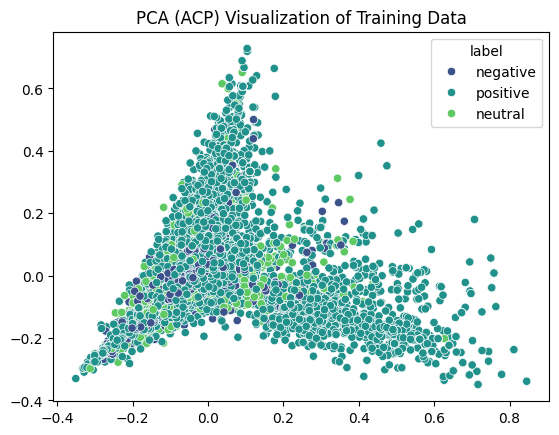

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

# Visualize the PCA results
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="viridis")
plt.title("PCA (ACP) Visualization of Training Data")
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_pca, y_train)

y_pred_svm = svm_model.predict(X_test_pca)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.6815
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       813
     neutral       0.00      0.00      0.00       461
    positive       0.68      1.00      0.81      2726

    accuracy                           0.68      4000
   macro avg       0.23      0.33      0.27      4000
weighted avg       0.46      0.68      0.55      4000



/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)

y_pred_rf = rf_model.predict(X_test_pca)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.663
              precision    recall  f1-score   support

    negative       0.39      0.29      0.33       813
     neutral       0.36      0.14      0.20       461
    positive       0.73      0.86      0.79      2726

    accuracy                           0.66      4000
   macro avg       0.49      0.43      0.44      4000
weighted avg       0.62      0.66      0.63      4000



In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_pca, y_train)
y_pred_lr = lr_model.predict(X_test_pca)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.68125
              precision    recall  f1-score   support

    negative       0.40      0.00      0.00       813
     neutral       0.00      0.00      0.00       461
    positive       0.68      1.00      0.81      2726

    accuracy                           0.68      4000
   macro avg       0.36      0.33      0.27      4000
weighted avg       0.55      0.68      0.55      4000



/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
